In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/DT on electronics/Computer_DTree.csv')

In [5]:
print(data)

            age  income student credit_rating buys_computer
0         youth    high      no          fair            no
1         youth    high      no     excellent            no
2   middle_aged    high      no          fair           yes
3        senior  medium      no          fair           yes
4        senior     low     yes          fair           yes
5        senior     low     yes     excellent            no
6   middle_aged     low     yes     excellent           yes
7         youth  medium      no          fair            no
8         youth     low     yes          fair           yes
9        senior  medium     yes          fair           yes
10        youth  medium     yes     excellent           yes
11  middle_aged  medium      no     excellent           yes
12  middle_aged    high     yes          fair           yes
13       senior  medium      no     excellent            no


In [6]:
data2=data.copy()
data_t = {"buys_computer": {"yes": 1, "no": 0}}
data2.replace(data_t, inplace=True)
print(data2)

            age  income student credit_rating  buys_computer
0         youth    high      no          fair              0
1         youth    high      no     excellent              0
2   middle_aged    high      no          fair              1
3        senior  medium      no          fair              1
4        senior     low     yes          fair              1
5        senior     low     yes     excellent              0
6   middle_aged     low     yes     excellent              1
7         youth  medium      no          fair              0
8         youth     low     yes          fair              1
9        senior  medium     yes          fair              1
10        youth  medium     yes     excellent              1
11  middle_aged  medium      no     excellent              1
12  middle_aged    high     yes          fair              1
13       senior  medium      no     excellent              0


In [7]:
x=data2.iloc[:,0:4]
y=data2.iloc[:,4]

In [8]:
x1=pd.get_dummies(x)
x1

,age_middle_aged,age_senior,age_youth,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair
0,0,0,1,1,0,0,1,0,0,1
1,0,0,1,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,1,0,0,1,1,0
6,1,0,0,0,1,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,0,1,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2)

In [10]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred=clf.predict(x_test)
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 66.666667


In [12]:
print(y_test.values)
print(y_pred)

[0 1 1]
[0 1 0]


[Text(223.20000000000002, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(186.0, 152.208, 'X[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 152.208, 'gini = 0.0\nsamples = 

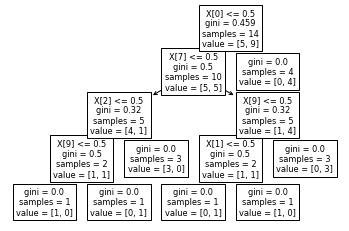

In [13]:

from sklearn import tree
tree.plot_tree(clf.fit(x1, y)) 